# Estadistica Aplicada
## Edwin Javier Hernandez Rodriguez
### 10ma Sesion 28feb 2023

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as plt
from lifelines import ExponentialFitter
%matplotlib inline

In [2]:
from lifelines import KaplanMeierFitter

In [5]:
#introducir datos
dic1 = {'tiempo':[6,6,6,7,10,13,16,22,23,6,9,11,17,10,19,20,25,32,32,34,35],
        'evento': [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]}

In [6]:
datos = pd.DataFrame(dic1)

In [12]:
kmf1 = KaplanMeierFitter().fit(datos['tiempo'], datos['evento'])

In [13]:
kmf1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,21,21
6.0,4,3,1,0,21
7.0,1,1,0,0,17
9.0,1,0,1,0,16
10.0,2,1,1,0,15
11.0,1,0,1,0,13
13.0,1,1,0,0,12
16.0,1,1,0,0,11
17.0,1,0,1,0,10


In [14]:
kmf1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
6.0,0.857143
7.0,0.806723
9.0,0.806723
10.0,0.752941
11.0,0.752941
13.0,0.690196
16.0,0.627451
17.0,0.627451


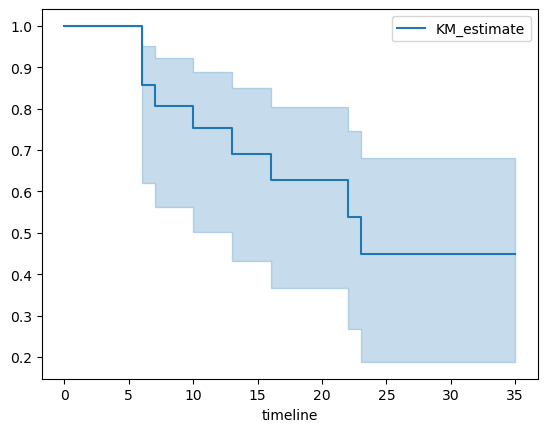

In [15]:
kmf1.plot_survival_function();

In [16]:
kmf1.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
6.0,0.619718,0.951552
7.0,0.563147,0.922809
9.0,0.563147,0.922809
10.0,0.503200,0.889362
11.0,0.503200,0.889362
13.0,0.431610,0.849066
16.0,0.367511,0.804912
17.0,0.367511,0.804912
19.0,0.367511,0.804912


In [17]:
kmf1.median_survival_time_

23.0

Hasta el tiempo 23 el 50% de los individuos ha sufrido el evento

In [18]:
kmf1.plot_hazard

<bound method KaplanMeierFitter.plot_hazard of <lifelines.KaplanMeierFitter:"KM_estimate", fitted with 21 total observations, 12 right-censored observations>>

En el modelo de Kaplan-Meier no se puede obtener la función de riesgo

In [23]:
dic_tra = {'tiempo': [12,19,20,20,33],
           'evento': [1,1,1,0,0]}

In [24]:
dic_not = {'tiempo': [3,5,7,9,18],
           'evento': [1,1,1,0,1]}

In [25]:
tratam = pd.DataFrame(dic_tra)
no_trat = pd.DataFrame(dic_not)


In [26]:
tratam

,tiempo,evento
0,12,1
1,19,1
2,20,1
3,20,0
4,33,0


In [27]:
no_trat

,tiempo,evento
0,3,1
1,5,1
2,7,1
3,9,0
4,18,1


In [28]:
kmf_t = KaplanMeierFitter().fit(tratam['tiempo'], tratam['evento'])
kmf_n = KaplanMeierFitter().fit(no_trat['tiempo'], no_trat['evento'])

<AxesSubplot:xlabel='timeline'>

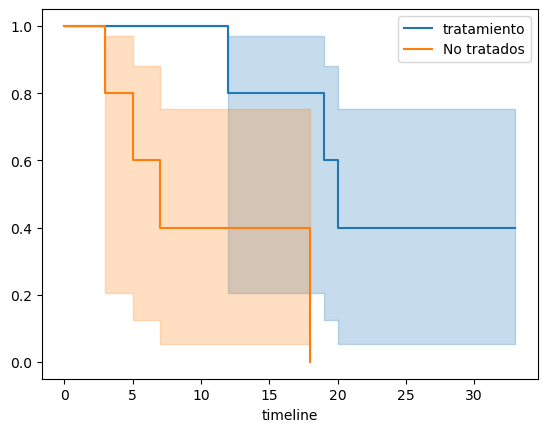

In [29]:
kmf_t.plot_survival_function(label = 'tratamiento')
kmf_n.plot_survival_function(label = 'No tratados')

La función de supervivencia de los que si reciben tratamiento es más alta, mientras los que no reciben tratamiento es baja. Si los IC se empalman significa que las variables pueden ser iguales, es decir, que en esa parte donde se empalman las f de supervivencia son iguales. Ya no es tan claro que los que si reciben y los que no, sean iguales

Log-Ranktest ~ X^2

$H0: S1(t) = S2(t) <- funciones supervivencia iguales

Ha: S1(t) !=  S2(t)$

In [30]:
from lifelines.statistics import logrank_test

In [32]:
lrt = logrank_test(tratam['tiempo'], tratam['evento'],
                   no_trat['tiempo'], no_trat['evento'])

In [33]:
lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.50 0.01      7.34

In [34]:
lrt.p_value

0.006174984400799619

In [38]:
print(f'Con un p-value{lrt.p_value.round(2)}<0.05 Rechazamos H0 a un 95% de confianza, \n Significa que las funciones de supervivencia son distintas \n El tratamiento si tiene efecto')

Con un p-value0.01<0.05 Rechazamos H0 a un 95% de confianza, 
 Significa que las funciones de supervivencia son distintas 
 El tratamiento si tiene efecto


In [39]:
from lifelines import ExponentialFitter

In [42]:
ex1 = ExponentialFitter().fit(datos['tiempo'], datos['evento'])

<AxesSubplot:xlabel='timeline'>

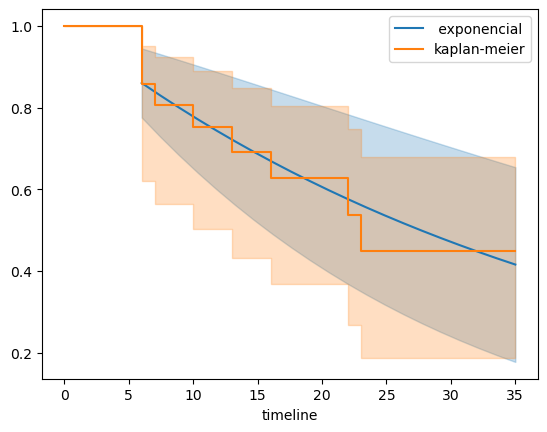

In [47]:
ex1.plot_survival_function(label = ' exponencial')
kmf1.plot_survival_function(label = 'kaplan-meier')

In [45]:
from lifelines import WeibullFitter

In [46]:
weib1 = WeibullFitter().fit(datos['tiempo'], datos[ 'evento'])

<AxesSubplot:xlabel='timeline'>

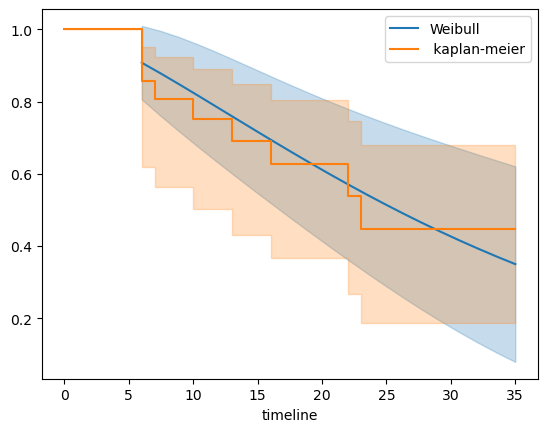

In [48]:
weib1.plot_survival_function(label = 'Weibull')
kmf1.plot_survival_function(label = ' kaplan-meier')